In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

import matplotlib.pyplot as plt
from IPython.display import display

In [10]:
plt.style.use('fivethirtyeight')
sns.set_style({'font.sans-serif':['simhei','Arial']})
%matplotlib inline

In [11]:
from sys import version_info
if version_info.major != 3:
    raise Exception('请使用Python 3 来完成此项目')

In [12]:
# 导入连接二手房数据
lianjia_df = pd.read_csv('Desktop/lianjia.csv')
display(lianjia_df.head(n=2))

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,NaN,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988


In [13]:
# 检查缺失值情况
lianjia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23677 entries, 0 to 23676
Data columns (total 12 columns):
Direction     23677 non-null object
District      23677 non-null object
Elevator      15440 non-null object
Floor         23677 non-null int64
Garden        23677 non-null object
Id            23677 non-null int64
Layout        23677 non-null object
Price         23677 non-null float64
Region        23677 non-null object
Renovation    23677 non-null object
Size          23677 non-null float64
Year          23677 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 2.2+ MB


In [14]:
lianjia_df.describe()

,Floor,Id,Price,Size,Year
count,23677.000000,2.367700e+04,23677.000000,23677.000000,23677.000000
mean,12.765088,1.011024e+11,610.668319,99.149301,2001.326519
std,7.643932,5.652477e+05,411.452107,50.988838,9.001996
min,1.000000,1.010886e+11,60.000000,2.000000,1950.000000
25%,6.000000,1.011022e+11,365.000000,66.000000,1997.000000
50%,11.000000,1.011025e+11,499.000000,88.000000,2003.000000
75%,18.000000,1.011027e+11,717.000000,118.000000,2007.000000
max,57.000000,1.011028e+11,6000.000000,1019.000000,2017.000000


In [15]:
# 添加新特征房屋均价

df = lianjia_df.copy()
df['Price'] = lianjia_df['Price']/lianjia_df['Size']

# 重新摆放列位置
columns = ['Region', 'District', 'Garden', 'Layout', 'Floor', 'Year', 'Size', 'Elevator', 'Direction', 'Renovation', 'PerPrice', 'Price']

df = pd.DataFrame(df, columns= columns)

# 重新审视数据集
display(df.head(n=2))

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,PerPrice,Price
0,东城,灯市口,锡拉胡同21号院,3室1厅,6,1988,75.0,NaN,东西,精装,NaN,10.40
1,东城,东单,东华门大街,2室1厅,6,1988,60.0,无电梯,南北,精装,NaN,11.75


In [20]:
df.groupby('Region')['Price'].count

<bound method SeriesGroupBy.count of <pandas.core.groupby.groupby.SeriesGroupBy object at 0x1a249034e0>>

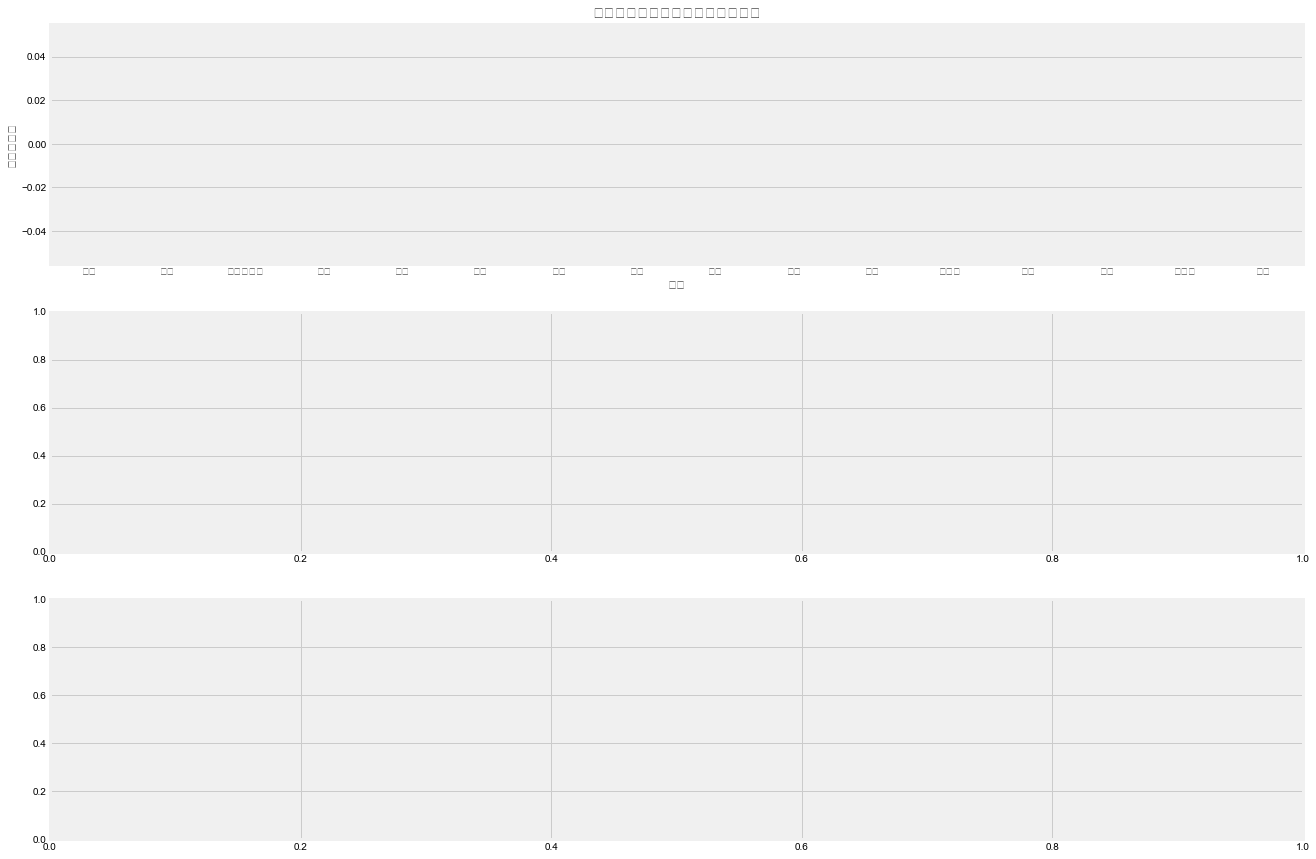

In [21]:
# 对二手房区域分组对比二手房数量和每平米房价
df_house_count = df.groupby('Region')['Price'].count().sort_values(ascending=False).to_frame().reset_index()
df_house_mean = df.groupby('Region')['PerPrice'].mean().sort_values(ascending=False).to_frame().reset_index()

f, [ax1,ax2,ax3] = plt.subplots(3,1,figsize=(20,15))
sns.barplot(x='Region', y='PerPrice', palette="Blues_d", data=df_house_mean, ax=ax1)
ax1.set_title('北京各大区二手房每平米单价对比',fontsize=15)
ax1.set_xlabel('区域')
ax1.set_ylabel('每平米单价')

# sns.barplot(x='Region', y='Price', palette="Greens_d", data=df_house_count, ax=ax2)
# ax2.set_title('北京各大区二手房数量对比',fontsize=15)
# ax2.set_xlabel('区域')
# ax2.set_ylabel('数量')

# sns.boxplot(x='Region', y='Price', data=df, ax=ax3)
# ax3.set_title('北京各大区二手房房屋总价',fontsize=15)
# ax3.set_xlabel('区域')
# ax3.set_ylabel('房屋总价')

plt.show()